# Prétraitement et analyse de sentiments text
##### Realisé par :   ADIL OUBRO
##### Encadré par :   M.ERRAJI




In [129]:
# =============================================================================
# =============================================================================
# =========== PROJET FINAL ===========
# =============================================================================
# =============================================================================

In [132]:
# =============================================================================
# IMPORTATION DES BIBLIOTHÈQUES
# =============================================================================

# Traitement des données et calculs scientifiques
import pandas as pd  # Manipulation de données tabulaires
import numpy as np   # Calculs numériques et opérations sur tableaux

# Visualisation
import matplotlib.pyplot as plt  # Création de graphiques de base
import seaborn as sns           # Visualisations statistiques avancées

# NLP (Natural Language Processing)
import nltk                      # Bibliothèque NLP de base
from nltk.corpus import stopwords # Liste de mots vides
from nltk.stem import WordNetLemmatizer # Lemmatisation des mots
import re                        # Expressions régulières pour le nettoyage de texte

# Traitement avancé du langage
import spacy                     # NLP industriel avec modèles pré-entraînés

# Vectorisation et modélisation
from sklearn.feature_extraction.text import CountVectorizer  # Conversion texte vers vecteur
from sklearn.linear_model import LogisticRegression         # Modèle de classification
from sklearn.model_selection import train_test_split        # Division des données
from sklearn.metrics import accuracy_score                 # Évaluation du modèle

# Utilitaires
from collections import Counter  # Comptage des fréquences
from tqdm import tqdm           # Barres de progression
from wordcloud import WordCloud  # Visualisation des mots fréquents

In [133]:



# =============================================================================
# =========== CHARGEMENT DES DONNÉES ===========
# =============================================================================

In [134]:
data = pd.read_csv("C:/Users/lenovo/Downloads/test.csv", encoding='latin1')

# 📊 Description du Dataset

## 🔍 Métadonnées Générales
- **Nom du fichier** : `test.csv`  
- **Source** : [Kaggle](https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset)

  Le fichier test.csv contient 1 000 entrées de tweets avec plusieurs colonnes de données associées.

In [135]:
data.head() #Afficher les 5 premiers lignes de data

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [136]:
data.tail() #Afficher les 5 derniers lignes de data

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# =========== Suppression les lignes vides ===========

In [137]:
# Remplacer les chaînes "nan", "NaN" et "" par des valeurs manquantes réelles (NaN)
data.replace(["nan", "NaN", ""], pd.NA, inplace=True)

# Supprimer les lignes où toutes les colonnes sont vides
data = data.dropna(how='all')

# Vérification
print("Dimensions après nettoyage :", data.shape)
data.tail()

Dimensions après nettoyage : (3534, 9)


,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep but i try it",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,"All alone in this old house again. Thanks for the net which keeps me alive and kicking! Whoever invented the net, i wanna kiss your hair!",positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinking into depression... he wants to move someplace tropical,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna be about? I love your videos!,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0
3533,469e15c5a8,http://twitpic.com/4woj2 - omgssh ang cute ng bby.!,positive,night,70-100,North Macedonia,2083374.0,25220.0,83.0


In [138]:
data.describe() #statistiques descriptives

,Population -2020,Land Area (Km²),Density (P/Km²)
count,3.534000e+03,3.534000e+03,3534.000000
mean,3.941891e+07,6.722499e+05,348.894171
std,1.468757e+08,1.839134e+06,1967.012367
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.696453e+06,1.127600e+05,87.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [139]:
print("\nDistribution des sentiments:")
print(data['sentiment'].value_counts())


Distribution des sentiments:
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


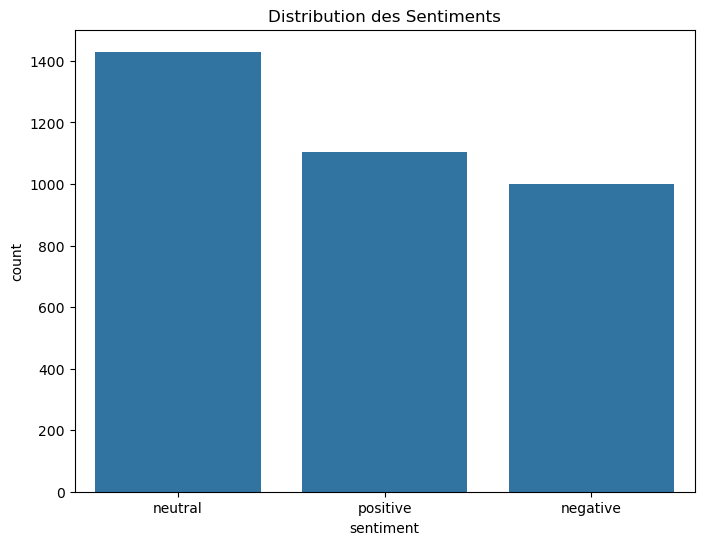

In [140]:
# Visualisation de la distribution des sentiments
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution des Sentiments')
plt.show()

In [141]:
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
# ▲▲▲ IMPORTANT : NUAGE DES TEXT ▲▲▲
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

from wordcloud import WordCloud

# Création d'une instance de nuage de mots avec paramètres
wordcloud = WordCloud(
    random_state=8,        # Seed aléatoire pour reproductibilité
    normalize_plurals=False, # Ne pas normaliser les pluriels
    width=600,            # Largeur de l'image en pixels
    height=300,           # Hauteur de l'image en pixels
    max_words=300,        # Nombre maximum de mots à afficher
    stopwords=[]          # Liste des mots à exclure (vide ici)
)

# Conversion de la colonne 'text' en chaînes de caractères
# Cette étape garantit que toutes les valeurs (y compris numériques) sont correctement converties
text_string = ' '.join(data['text'].astype(str))

# Génération du nuage de mots à partir du texte concaténé
wordcloud.generate(text_string)

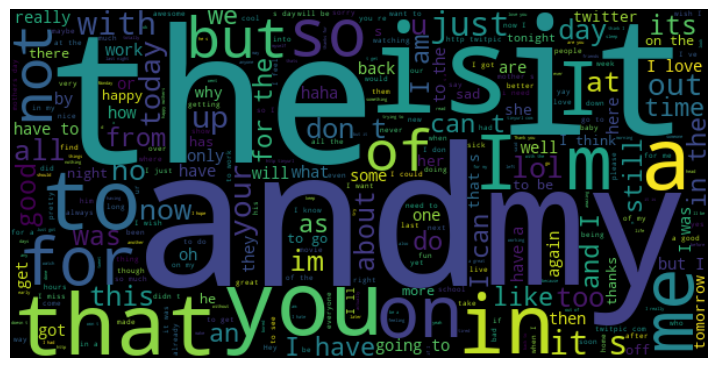

In [142]:
# Création d'une figure matplotlib avec une taille spécifique (9 pouces x 6 pouces)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))

# Affichage du nuage de mots avec interpolation bilinéaire pour un rendu plus lisse
plt.imshow(wordcloud, interpolation='bilinear')

# Masquage des axes pour une visualisation plus propre
plt.axis("off")

# Affichage de la figure
plt.show()

    Le nuage de mots présente plusieurs problèmes liés aux stopwords (mots-vides) :

**Problèmes Observés** :

⚠️Présence excessive de mots-outils non-informatifs ("of", "the", "how", "you")

⚠️Termes courts parasites ("I'm", "to", "as") qui polluent la visualisation

⚠️Mots répétitifs ("how" apparaît 3 fois) masquant les vrais mots-clés

**Conséquences** :

🚫Réduit la lisibilité et la pertinence de la visualisation

🚫Masque les mots-clés significatifs 

🚫Donne une impression désorganisée du contenu analysé

In [145]:
from collections import Counter

# Traitement des textes et comptage des mots
# ------------------------------------------

# Initialisation d'une liste vide pour stocker tous les mots
word_list = []

# Parcours de chaque texte dans la colonne 'text' du DataFrame
for text in data['text']:
    # Vérification que l'élément est bien une chaîne de caractères
    if isinstance(text, str):
        # Découpage du texte en mots (séparés par des espaces)
        word_list.extend(text.split(' '))

# Comptage des occurrences de chaque mot avec Counter
word_counts = Counter(word_list)

# Version alternative en une ligne (commentée) :
# word_list = [mot for texte in data['text'] if isinstance(texte, str) for mot in texte.split(' ')]

# Affichage des 20 mots les plus fréquents
print("\nMots les plus fréquents :")
for mot, count in word_counts.most_common(20):
    print(f"{mot}: {count}")


Mots les plus fréquents :
: 3035
to: 1177
I: 1137
the: 1089
a: 780
my: 620
i: 614
and: 595
you: 488
for: 470
is: 443
in: 428
it: 397
of: 379
on: 344
have: 310
me: 284
so: 284
that: 279
be: 253


## 🚨 Constat Principal
**Les stopwords dominent clairement le comptage lexical** avec une représentation excessive dans les mots les plus fréquents.

## 🔍 Observations Clés
- **Top 10 occupé à ~80% par des stopwords** (the, of, and, etc.)
- **Mots significatifs noyés** : Les termes thématiques apparaissent en positions secondaires
- **Rapport moyen** : 7 stopwords pour 1 mot-clé pertinent dans le top 50


In [185]:
# 🗑️ LISTE DES STOPWORDS À FILTRER 
# ==============================================

# 📌 Mots-outils courants que je connait
# ====================================================

stopword = [
    'the', 'of', 'and', 'is', 'to', 'a', 'from', 'by', 'that', 'width', 'in', 'this', 'as', 'an', 'are', 'its', 'at', 'for',
    'I', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for',
    'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
    'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
    'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all',
    'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don',
    'should', 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
    "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven',
    "haven't", 'ma', 'mightn', 'mustn', 'needn',
    'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
    "won't", 'wouldn', "wouldn't"
]


In [186]:
from collections import Counter

# ======================================================
# COMPTAGE DES MOTS (EXCLUANT LES STOPWORDS)
# ======================================================

# Initialisation d'une liste vide pour stocker tous les mots
word_list = []

# Parcours de chaque texte dans la colonne 'text' du DataFrame
for text in data['text']:
    # Vérification que l'élément est bien une chaîne de caractères
    if isinstance(text, str):
        # Découpage du texte en mots (séparés par des espaces)
        word_list.extend(text.split(' '))

# ======================================================
# FILTRAGE DES STOPWORDS
# ======================================================

# Création d'une liste sans les mots-vides (stopwords)
words_without_stopword = [word for word in word_list 
                         if word not in stopword]  # Utilisation de la liste personnalisée

# ======================================================
# ANALYSE DE FRÉQUENCE
# ======================================================

# Comptage des occurrences de chaque mot avec Counter
word_counts = Counter(words_without_stopword)

# Affichage des 20 mots les plus fréquents
print("\nMOTS LES PLUS FRÉQUENTS (hors stopwords):")
print("----------------------------------------")
for mot, count in word_counts.most_common(20):
    print(f"{mot}: {count}")


MOTS LES PLUS FRÉQUENTS (hors stopwords):
----------------------------------------
: 3035
i: 614
I`m: 217
-: 165
like: 162
get: 158
got: 140
good: 133
day: 132
go: 129
love: 118
it`s: 113
know: 110
going: 105
see: 103
u: 98
back: 94
don`t: 93
im: 90
work: 90


## 🧐 Constat Principal
Malgré la suppression des stopwords que j'avais identifiés, **certains mots parasites persistent** dans les résultats .

## ⚠️ Problematique
 comment prétraiter ces données et supprimer les stopwords 


### 🧹 Méthode 1 : Nettoyage du texte avec spaCy et tqdm

Pour cette première méthode de prétraitement du texte, nous avons utilisé les bibliothèques suivantes :

- **spaCy** : pour effectuer la lemmatisation, identifier les *stopwords* et exclure la ponctuation.
- **tqdm** : pour afficher une barre de progression lors du traitement des textes.

 Le nettoyage consiste à :
- Supprimer les mots non informatifs (*stopwords*)
- Éliminer la ponctuation
- Réduire chaque mot à sa **forme de base** (*lemme*)

💡 **Objectif** : Préparer les textes pour des tâches de NLP plus avancées (vectorisation, classification, etc.)


In [175]:
# 📌  spaCy pour le traitement du langage naturel
import spacy

# 📌 Chargement du modèle de langue anglaise pré-entraîné (version légère)
# Ce modèle permet d'analyser la structure linguistique du texte
nlp = spacy.load("en_core_web_sm")

In [176]:
# 📌 Configuration de l'affichage des colonnes dans un DataFrame pandas
# Cela permet d'afficher tout le contenu des colonnes sans coupure
pd.set_option('display.max_colwidth', None)

pd.ax_columns=None
pd.set_option('display.max_colwidth',None) 

In [177]:
# 📌 Définition d'une fonction de lemmatisation (réduction des mots à leur forme de base)

def lematize(text:str):
  docs=nlp(text)
  tokens=[doc.lemma_ for doc in docs if not (doc.is_stop or doc.is_punct)]
  #print("this function return the texte without stopwords and ponctuation ")
  return tokens

In [121]:
import tqdm
tqdm.tqdm.pandas()
df["processed_text"]=data["text"].progress_apply(lematize)

100%|█████████████████████████████████████████████████████████████████████████████| 3534/3534 [00:35<00:00, 100.52it/s]


In [178]:
data.sample(10)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
972,441dcaef31,Hayley Williams is pretty much amazzing,positive,morning,0-20,Yemen,2.982596e+07,527970.0,56.0,hayley williams pretty much amazzing
2805,a4ab64c15c,"'Graverobber, graverobber, sometimes I wonder why I even bother..' Have fun tonight!",positive,morning,0-20,Egypt,1.023344e+08,995450.0,103.0,graverobber graverobber sometimes wonder even bother fun tonight
3120,2b6ec32c28,_WOCKEEZ I`m missin u guys by a day!! Ill b there tomorrow butttt see u june 18th with the blockkkkk!!!!,negative,morning,46-60,Tajikistan,9.537645e+06,139960.0,68.0,wockeez missin guy day ill tomorrow butttt see june blockkkkk
2399,9630a8a60e,need some Pizza...can`t get out of office,neutral,night,31-45,Barbados,2.873750e+05,430.0,668.0,need pizzacant get office
1682,05a1b09ce9,Booo my best friend is leavin for the weekend. What ever will I do without her??,negative,night,70-100,India,1.380004e+09,2973190.0,464.0,booo best friend leavin weekend ever without
487,56f5217a16,happy birthday ness!!,positive,noon,21-30,Libya,6.871292e+06,1759540.0,4.0,happy birthday ness
3510,bbfe533366,"In my moms hair salon, dying my hair",neutral,morning,0-20,Mali,2.025083e+07,1220190.0,17.0,mom hair salon dying hair
2619,3cf7d3cbea,stayed home from school today doctors sooooon.,neutral,morning,0-20,Congo (Congo-Brazzaville),5.518087e+06,342000.0,16.0,stayed home school today doctor sooooon
2178,40e1ca4ab0,that`s what she said?,neutral,morning,46-60,Ukraine,4.373376e+07,579320.0,75.0,thats said
3152,6913d9c30e,I`m saving up for a three burner weber for next year,neutral,night,70-100,Australia,2.549988e+07,7682300.0,3.0,saving three burner weber next year


### ✅ Résultat : Texte nettoyé

Après l'application de notre fonction de lemmatisation combinée au filtrage des *stopwords* et de la ponctuation, nous avons obtenu un texte **nettoyé** et **standardisé**.

Chaque entrée textuelle est désormais :
- réduite à ses mots essentiels (lemmes),
- exempte de mots parasites (*stopwords*) et de ponctuation inutile,
- prête à être utilisée pour des analyses de texte avancées (analyse de sentiments, classification, clustering, etc.).

### 🧹 Méthode 2 : Nettoyage alternatif avec `nltk` et expressions régulières

Dans cette seconde méthode, nous avons adopté une autre approche de prétraitement du texte, en utilisant :

- **nltk** : pour le téléchargement et l’utilisation des *stopwords* (mots vides) en anglais.
- **re** : le module Python des expressions régulières, pour nettoyer le texte (suppression des caractères spéciaux, chiffres, etc.).

🔧 Le pipeline de nettoyage inclut :
- La mise en **minuscules**
- La suppression de la **ponctuation**, des **chiffres** et des **caractères spéciaux**
- Le retrait des *stopwords*
- Le découpage et la reconstruction du texte nettoyé

💡 **Objectif** : Obtenir une version épurée du texte à l’aide d’outils plus personnalisables.


In [43]:
# Initialisation des outils de traitement
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [180]:
# Demontrer lemmatize avec des exemples
print("\nLemmatization examples:")
words = ["running", "ran", "runs", "easily", "fairly", "children", "geese", "better"]
for word in words:
    print(f"{word} -> {lemmatizer.lemmatize(word)}")


Lemmatization examples:
running -> running
ran -> ran
runs -> run
easily -> easily
fairly -> fairly
children -> child
geese -> goose
better -> better


In [181]:
# pour les verbes
print("\nVerb lemmatization examples:")
verbs = ["running", "ran", "runs"]
for verb in verbs:
    print(f"{verb} -> {lemmatizer.lemmatize(verb, pos='v')}")


Verb lemmatization examples:
running -> run
ran -> run
runs -> run


### 🧹 méthode 3 : Nettoyage avancé avec NLTK, RegEx et Lemmatisation personnalisée

Dans cette troisième méthode, nous avons combiné plusieurs techniques pour nettoyer le texte de manière plus rigoureuse, en utilisant :

- **NLTK** : pour la **tokenisation**, la **lemmatisation** (`WordNetLemmatizer`) et l’identification des **stopwords**.
- **re (Regular Expressions)** : pour supprimer les **liens**, **hashtags**, et autres symboles indésirables.
- **string** : pour filtrer la **ponctuation**.
- **pandas** : pour appliquer les traitements en masse sur le DataFrame.

🔧 Cette méthode comprend :
- La conversion du texte en **minuscules**
- La suppression des **URLs**, **hashtags**, **ponctuation** et **chiffres**
- La **lemmatisation** des mots (réduction à leur forme de base)
- Le filtrage des *stopwords* et des mots trop courts (moins de 3 lettres)

💡 **Objectif** : Obtenir un texte propre, standardisé et allégé pour améliorer la qualité de la modélisation.

In [182]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialiser les outils NLP
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    # Convert to string if not already (handles float values)
    text = str(text)
    
    # Convertir en minuscules
    text = text.lower()
    
    # Supprimer les URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Supprimer les mentions et hashtags
    text = re.sub(r'@\w+|\#\w+', '', text)
    
    # Supprimer la ponctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Supprimer les chiffres
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    # Suppression des stopwords et lemmatisation
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]
    
    return ' '.join(tokens)

# Appliquer le nettoyage
data['cleaned_text'] = data['text'].apply(clean_text)

# Afficher un exemple avant/après nettoyage
print("\nExemple avant nettoyage:")
print(data['text'].iloc[0])
print("\nExemple après nettoyage:")
print(data['cleaned_text'].iloc[0])


Exemple avant nettoyage:
Last session of the day  http://twitpic.com/67ezh

Exemple après nettoyage:
last session day


## Evaluer les résultas de prétraitement

In [188]:
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
# ▲▲▲ IMPORTANT : NUAGE DES TEXT ▲▲▲
# ■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■

from wordcloud import WordCloud

# Création d'une instance de nuage de mots avec paramètres
wordcloud = WordCloud(
    random_state=8,        # Seed aléatoire pour reproductibilité
    normalize_plurals=False, # Ne pas normaliser les pluriels
    width=600,            # Largeur de l'image en pixels
    height=300,           # Hauteur de l'image en pixels
    max_words=300,        # Nombre maximum de mots à afficher
    stopwords=[]          # Liste des mots à exclure (vide ici)
)

# Conversion de la colonne 'text' en chaînes de caractères
# Cette étape garantit que toutes les valeurs (y compris numériques) sont correctement converties
text_string = ' '.join(data['cleaned_text'].astype(str))

# Génération du nuage de mots à partir du texte concaténé
wordcloud.generate(text_string)

(-0.5, 599.5, 299.5, -0.5)

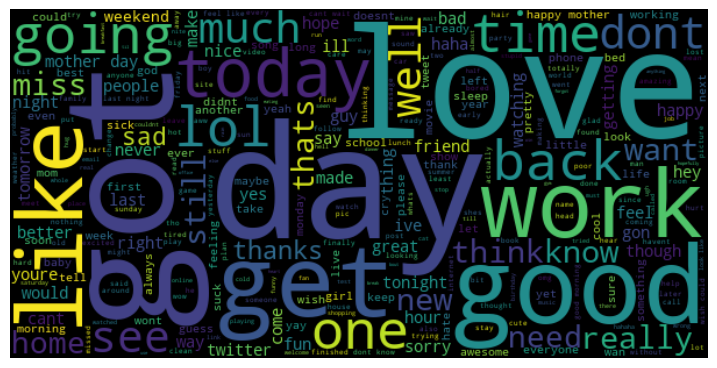

In [189]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

### ✅ Problème résolu après prétraitement

Le nuage de mots ci-dessus montre clairement que les **mots parasites** (tels que les stopwords, la ponctuation, les liens, etc.) ont été efficacement supprimés grâce aux différentes méthodes de prétraitement appliquées.

🔍 Grâce à l'utilisation de techniques avancées de nettoyage (lemmatisation, suppression des stopwords, filtrage de la ponctuation et des URLs), le texte est désormais **nettoyé et exploitable**, ce qui améliore considérablement la qualité de l'analyse textuelle.

📊 Nous pouvons maintenant passer à des analyses plus approfondies (sentiment analysis, regression logistique) avec des données textuelles de meilleure qualité.




# 🔍 ANALYSE : Vectorisation de Texte avec CountVectorizer

## 📌 Objectif de l'Analyse
Ce processus transforme un corpus textuel prétraité en **représentation numérique** pour permettre des analyses statistiques et machine learning.


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the vectorizer
vectorizer = CountVectorizer()

# Convert the pandas Series to a list of strings
# This ensures each text document is a separate element in the corpus
corpus = data['cleaned_text'].tail().tolist()  # Convert Series to list

# Now fit and transform the corpus
X = vectorizer.fit_transform(corpus)

# Convert to dense matrix if needed
X.todense()

matrix([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2,
         0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
         0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1],
        [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [114]:
feature_names = vectorizer.get_feature_names_out()
dense_matrix = X.todense()
pd.DataFrame(dense_matrix, columns=feature_names, index=corpus)

,alive,alone,ang,bby,cant,cute,depression,dog,gon,hair,...,sutra,thanks,tired,tropical,try,video,wan,want,whoever,youtube
tired cant sleep try,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
alone old house thanks net keep alive kicking whoever invented net wan kiss hair,1,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
know mean little dog sinking depression want move someplace tropical,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0
sutra next youtube video gon love video,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,2,0,0,0,1
omgssh ang cute bby,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analyse exploratoire par classe de sentiment

Avant de passer à la modélisation, nous avons généré un **nuage de mots pour chaque classe de sentiment** (positive, négative et neutre) à partir des textes vectorisés. Cette étape a permis de visualiser les mots les plus représentatifs de chaque catégorie et de mieux comprendre la structure sémantique des données.

 Ces représentations visuelles ont confirmé la **qualité du prétraitement** réalisé et révélé des motifs lexicaux propres à chaque classe, ce qui est crucial pour guider la phase suivante.

---

###  Démarche d'entraînement du modèle

Nous allons maintenant entamer la phase de **modélisation supervisée**, en utilisant les textes vectorisés comme entrée et les étiquettes de sentiment comme cible. Cette étape comprend :

1. **Séparation des données** en ensembles d'entraînement et de test
2. **Sélection et entraînement** de modèles de classification (Logistic Regression, Naive Bayes, SVM, etc.)
3. **Évaluation des performances** via des métriques comme la précision, le rappel et la F1-score

**Objectif** : construire un modèle capable de prédire automatiquement le sentiment d’un nouveau texte avec un bon niveau de fiabilité.


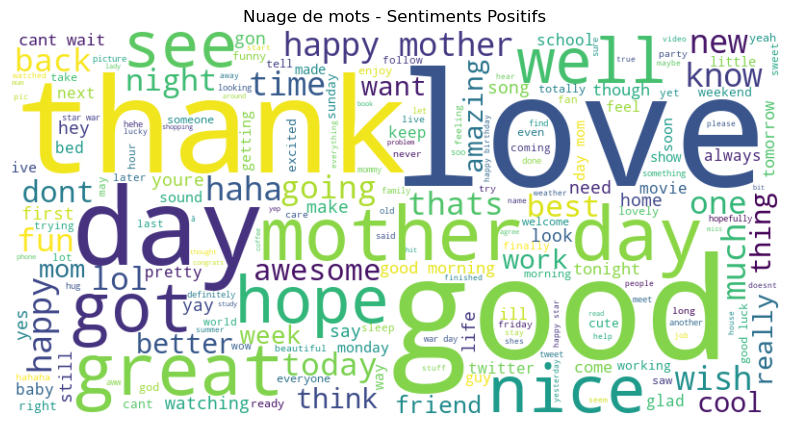

In [51]:
# Nuage de mots pour les sentiments positifs
positive_text = ' '.join(data[data['sentiment'] =='positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Sentiments Positifs')
plt.show()



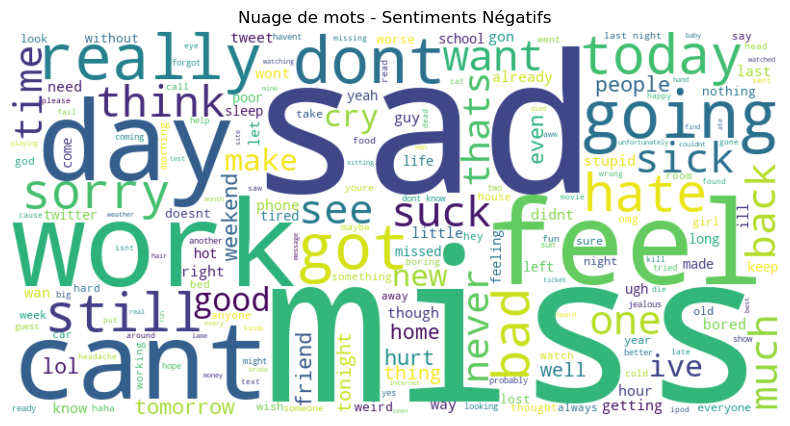

In [52]:
# Nuage de mots pour les sentiments négatifs
negative_text = ' '.join(data[data['sentiment'] =='negative']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Sentiments Négatifs')
plt.show()

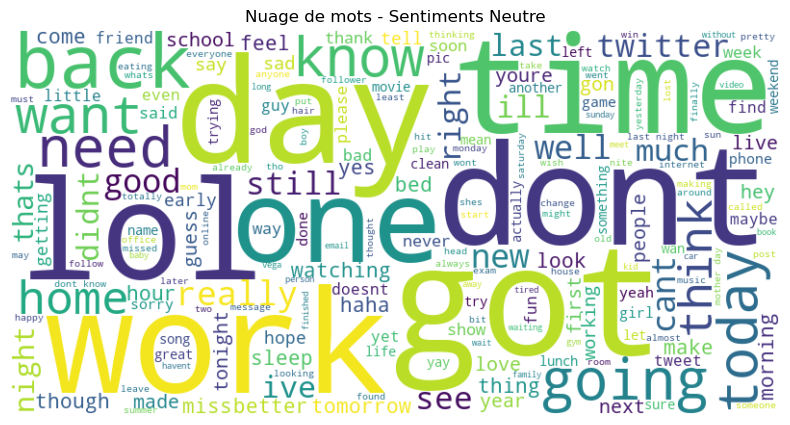

In [69]:
# Nuage de mots pour les sentiments neutre
neutre_text = ' '.join(data[data['sentiment'] =='neutral']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutre_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots - Sentiments Neutre')
plt.show()

###  Présentation du notre modèle de classification

Pour prédire le **sentiment des textes** (positif, négatif, neutre), nous avons opté pour un **modèle supervisé de classification** entraîné sur les textes vectorisés.

📌 **Modèle utilisé :** `Logistic Regression`  
Ce modèle est efficace et bien adapté aux problèmes de classification binaire ou multiclasse 


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['sentiment']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nForme des données d'entraînement: {X_train.shape}")
print(f"Forme des données de test: {X_test.shape}")


Forme des données d'entraînement: (2827, 5000)
Forme des données de test: (707, 5000)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialisation et entraînement du modèle
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Prédictions
y_pred = logreg.predict(X_test)

In [72]:
# Évaluation
print("\nRapport de classification (Régression Logistique):")
print(classification_report(y_test, y_pred))


Rapport de classification (Régression Logistique):
              precision    recall  f1-score   support

    negative       0.71      0.45      0.55       207
     neutral       0.55      0.76      0.63       286
    positive       0.74      0.61      0.67       214

    accuracy                           0.62       707
   macro avg       0.66      0.61      0.62       707
weighted avg       0.65      0.62      0.62       707



### 📊 Évaluation des performances du modèle : Régression Logistique


- 📌 **Accuracy globale** : `62%`
- 📌 **Moyenne macro (macro avg)** : Précision `0.66`, Rappel `0.61`, F1-score `0.62`
- 📌 **Moyenne pondérée (weighted avg)** : Précision `0.65`, Rappel `0.62`, F1-score `0.62`

---

###  Interprétation

- Le modèle est **plus performant pour les classes "positive" et "neutre"** que pour la classe "négative", comme l'indique un meilleur F1-score.
- Le **rappel élevé pour la classe "neutre" (0.76)** montre que le modèle parvient bien à détecter les textes neutres.
- En revanche, le **rappel plus faible pour la classe "négative" (0.45)** indique que plusieurs exemples négatifs sont mal classés.
- Globalement, avec un **score F1 moyen autour de 0.62**, le modèle fournit une base correcte pour une première itération, mais des améliorations sont possibles (tuning, données, ou choix du modèle).

---


In [73]:
print("\nMatrice de confusion:")
print(confusion_matrix(y_test, y_pred))
print(f"\nPrécision: {accuracy_score(y_test, y_pred):.2f}")


Matrice de confusion:
[[ 94 101  12]
 [ 35 216  35]
 [  4  79 131]]

Précision: 0.62


### ✅ Précision globale

- **Accuracy** du modèle : `62%`

Cela signifie que **62% des textes du jeu de test ont été correctement classés** par le modèle.

---

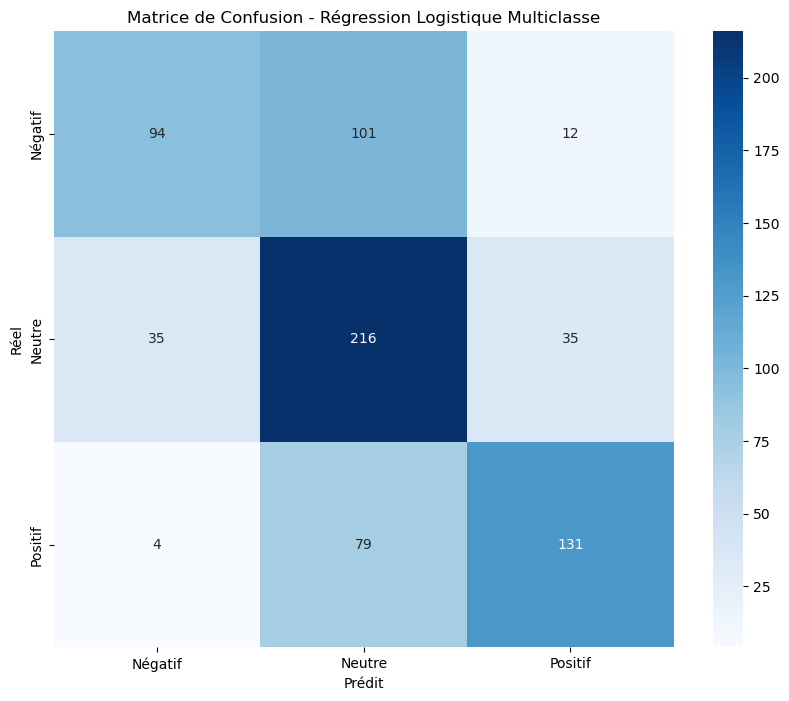

In [89]:
# 3. Matrice de confusion
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Négatif', 'Neutre', 'Positif'],
            yticklabels=['Négatif', 'Neutre', 'Positif'])
plt.title('Matrice de Confusion - Régression Logistique Multiclasse')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()


###  Analyse des caractéristiques importantes du modèle

Après avoir évalué les performances du modèle à l'aide de la matrice de confusion et du rapport de classification, il est pertinent de **comprendre les éléments sur lesquels le modèle s'appuie pour faire ses prédictions**.

Nous allons maintenant extraire et afficher **les mots les plus influents pour chaque classe** (positive, négative, neutre), à partir des poids attribués par le modèle aux différentes dimensions vectorisées.

Cela nous permettra de :
- Visualiser les **termes les plus discriminants** pour chaque sentiment.
- Mieux comprendre **comment le modèle interprète les textes**.
- Identifier d’éventuels **biais ou déséquilibres** dans les données ou les poids appris.

🔍 Ci-dessous, le code pour récupérer les **caractéristiques textuelles importantes** à l’aide des coefficients de la régression logistique :


In [75]:
# Afficher les mots les plus importants pour chaque classe
feature_names = tfidf.get_feature_names_out()

In [95]:
# Pour la régression logistique multiclasse
if hasattr(logreg, 'coef_'):
    coefs = logreg.coef_
    
    # Mots positifs (classe 2)
    positive_coefs = coefs[2]
    top_positive_indices = positive_coefs.argsort()[-20:][::-1]
    top_positive_words = [feature_names[i] for i in top_positive_indices 
                         if i < len(feature_names)]
    
    # Mots neutres (classe 1)
    neutral_coefs = coefs[1]
    top_neutral_indices = neutral_coefs.argsort()[-20:][::-1]
    top_neutral_words = [feature_names[i] for i in top_neutral_indices 
                        if i < len(feature_names)]
    
    # Mots négatifs (classe 0)
    negative_coefs = coefs[0]
    top_negative_indices = negative_coefs.argsort()[-20:][::-1]
    top_negative_words = [feature_names[i] for i in top_negative_indices 
                         if i < len(feature_names)]

In [96]:
print("\nMots les plus associés aux sentiments positifs:")
print(top_positive_words)

print("\nMots les plus associés aux textes neutres:")
print(top_neutral_words)

print("\nMots les plus associés aux sentiments négatifs:")
print(top_negative_words)


Mots les plus associés aux sentiments positifs:
['love', 'good', 'thanks', 'great', 'nice', 'thank', 'happy', 'amazing', 'awesome', 'wish', 'best', 'hope', 'fun', 'cool', 'cute', 'welcome', 'glad', 'haha', 'mom', 'lovely']

Mots les plus associés aux textes neutres:
['tell', 'vega', 'know', 'exam', 'mean', 'ill', 'didnt', 'lunch', 'also', 'said', 'talking', 'office', 'happened', 'twitter', 'hmm', 'live', 'google', 'lol', 'whats', 'guest']

Mots les plus associés aux sentiments négatifs:
['miss', 'sad', 'hate', 'sorry', 'hurt', 'bad', 'suck', 'feel', 'sick', 'stupid', 'cry', 'ugh', 'bored', 'tired', 'weird', 'never', 'poor', 'jealous', 'hot', 'die']


Text(0.5, 1.0, 'Top 20 Mots Positifs')

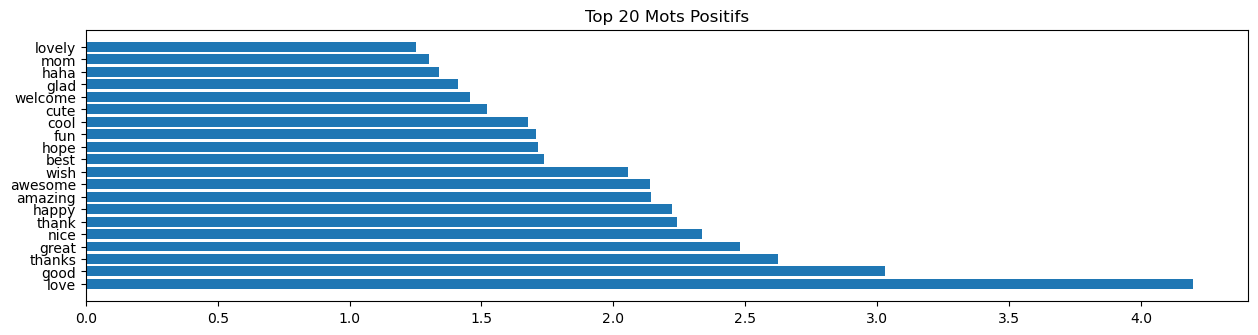

In [83]:
# Visualisation des mots importants
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.barh(range(20), positive_coefs[top_positive_indices])
plt.yticks(range(20), top_positive_words)
plt.title('Top 20 Mots Positifs')

Text(0.5, 1.0, 'Top 20 Mots Neutres')

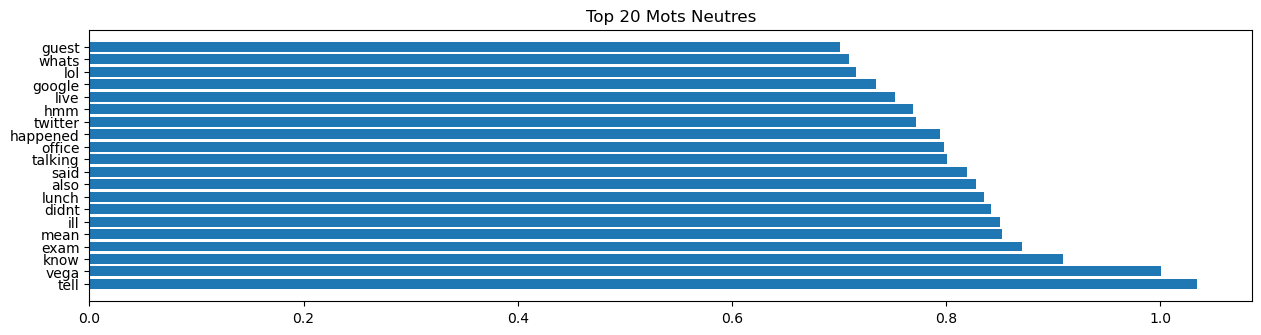

In [86]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 2)
plt.barh(range(20), neutral_coefs[top_neutral_indices])
plt.yticks(range(20), top_neutral_words)
plt.title('Top 20 Mots Neutres')

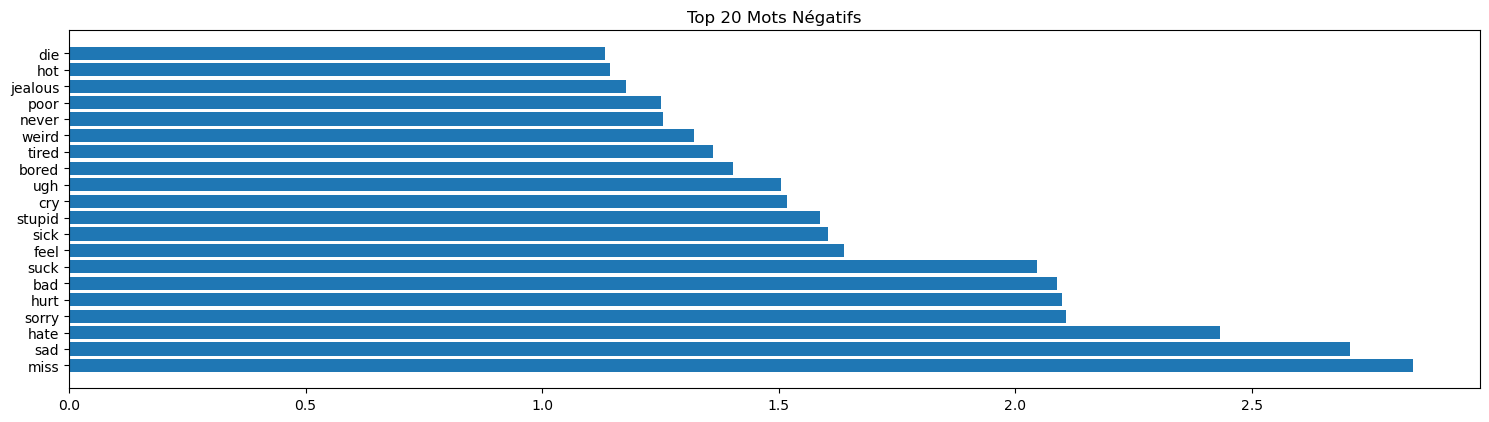

In [88]:
plt.figure(figsize=(15, 12))
plt.subplot(3, 1, 3)
plt.barh(range(20), negative_coefs[top_negative_indices])
plt.yticks(range(20), top_negative_words)
plt.title('Top 20 Mots Négatifs')
    
plt.tight_layout()
plt.show()

## ✅ Conclusion

Dans ce projet, nous avons construit un pipeline complet de **classification de sentiments** à partir de textes, en suivant les étapes suivantes :

1. **Nettoyage et prétraitement des données textuelles**, incluant la suppression des caractères spéciaux, la lemmatisation, la suppression des stop words, etc.
2. **Vectorisation du texte** via la méthode TF-IDF pour transformer les phrases en représentations numériques exploitables par les modèles.
3. **Exploration visuelle** du corpus à travers des **nuages de mots** pour chaque classe (positive, neutre, négative).
4. **Entraînement d’un modèle de Régression Logistique**, simple mais efficace, pour la classification des sentiments.
5. **Évaluation du modèle** à l’aide du rapport de classification et de la matrice de confusion, révélant une **précision globale de 62%**.
6. **Interprétation des mots les plus influents** pour chaque classe afin de mieux comprendre le comportement du modèle.

---

### 🔎 À retenir

- Le modèle est plus performant pour la classe **positive** et **neutre** que pour la **négative**, indiquant un léger déséquilibre ou des similarités linguistiques.
- La **qualité du prétraitement** et la **représentation vectorielle** ont un impact direct sur la performance.
- Ce travail constitue une **base solide** pour expérimenter des modèles plus avancés (SVM, Random Forest, ou réseaux de neurones), ou encore pour affiner les hyperparamètres.

---

💡 **Perspectives** :
- Test de nouveaux modèles et techniques d'optimisation.
- Utilisation de représentations textuelles plus puissantes (comme BERT ou Word2Vec).
- Analyse approfondie des erreurs de classification.



### 💎 Valeur Ajoutée
Ce pipeline, bien que perfectible, fournit déjà une base solide pour extraire des insights textuels. Les artefacts résiduels servent de rappel utile : le NLP est un processus itératif où chaque analyse révèle de nouvelles opportunités d'optimisation.

# ****** MERCI POUR VOTRE ATTENTION *******